# Gaussian Mixture Models

In this notebook we will implement GMM and compare the results with K-means clustering. 

In [102]:
#importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs,load_iris
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import adjusted_rand_score
%matplotlib inline

In [34]:
#making data with gaussian blobs function
data=make_blobs(n_samples=1000,cluster_std=[5, 1, 0.5],random_state=0)

In [35]:
#Splitting the data in dependent and independent feature
X,y=data[0],data[1]

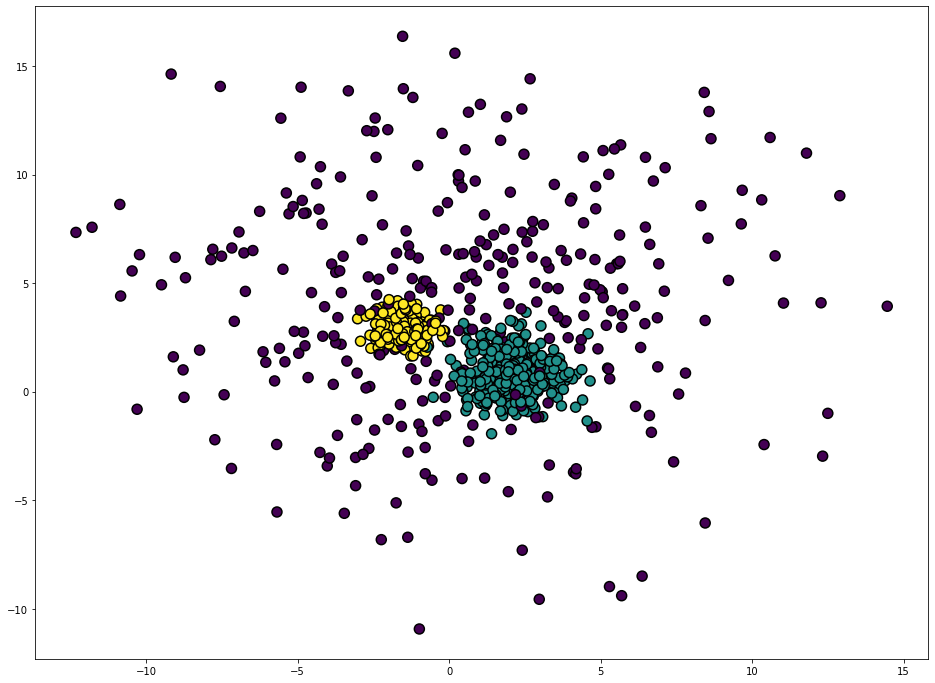

In [36]:
#plotting the data
#For good visualization, applied a bunch of parameters
plt.figure(figsize=(16,12))
plt.scatter(X[:,0],X[:,1],c=y,edgecolor='black', lw=1.5, s=100)

# KMeans

In [37]:
kmeans=KMeans(n_clusters=3)
predicted_kmeans=kmeans.fit_predict(X)

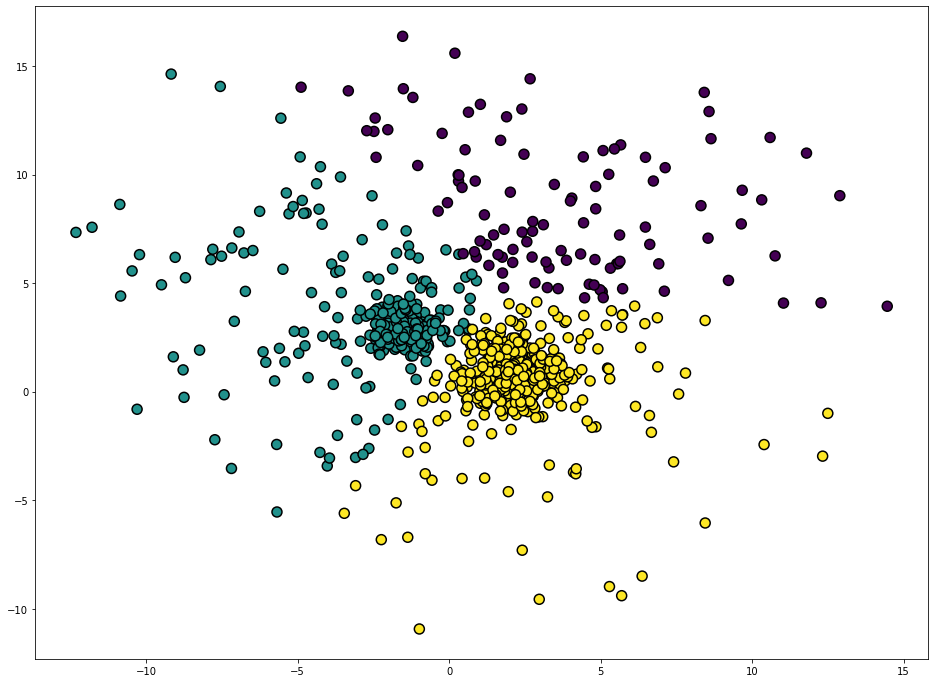

In [38]:
#Visualizing the kmeans predicted value
plt.figure(figsize=(16,12))
plt.scatter(X[:,0],X[:,1],c=predicted_kmeans,edgecolor='black', lw=1.5, s=100)

# GMM

In [39]:
gmm=GaussianMixture(n_components=3)
predicted_gmm=gmm.fit_predict(X)

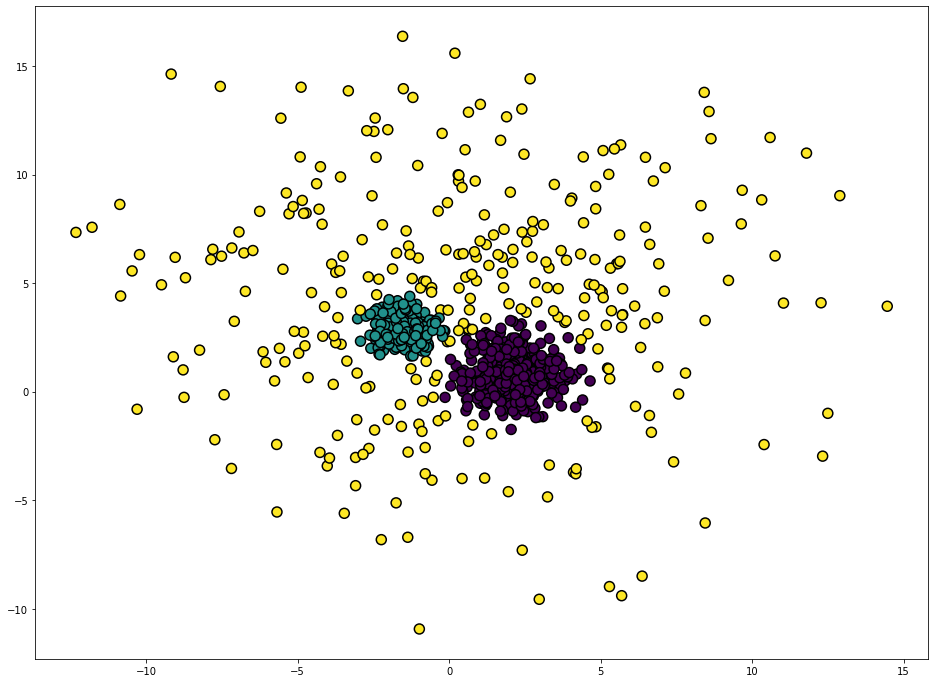

In [40]:
#Visualizing the GMM predicted value
plt.figure(figsize=(16,12))
plt.scatter(X[:,0],X[:,1],c=predicted_gmm,edgecolor='black', lw=1.5, s=100)

# Testing both Algorithm with Iris-Dataset

## Creating the dataset

In [73]:
target=pd.Series(load_iris().target)

In [74]:
dataset=pd.DataFrame(load_iris().data)

In [75]:
dataset=pd.concat([dataset,target],axis=1)

In [76]:
dataset.columns=['sepal_length','sepal_width','petal_length','petal_width','target']

In [77]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [106]:
X=dataset.drop('target',axis=1)
y=dataset['target']

[]

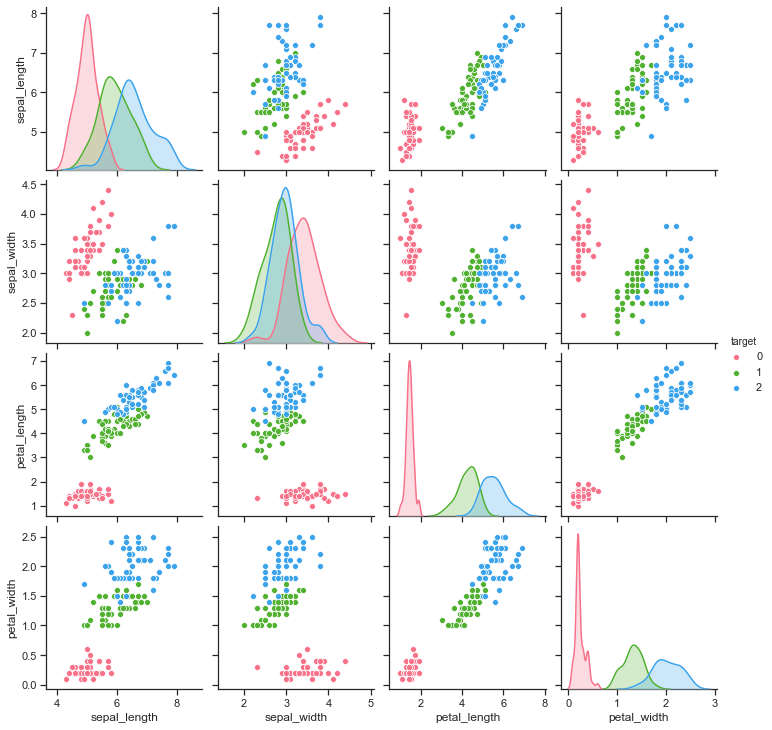

In [96]:
#visualizing the data with seaborn
#sns.set(style='ticks',)
plot=sns.pairplot(dataset,hue="target", palette="husl")
plt.plot()

In [99]:
#applying K means
kmeans_iris=KMeans(n_clusters=3)
pred_iris_kmeans=kmeans_iris.fit_predict(X)

In [100]:
#applying GMM 
gmm_iris=GaussianMixture(n_components=3)
pred_iris_gmm=gmm_iris.fit_predict(X)

In [107]:
#converting dependent variable into numpt array for giving it to metric
y_converted=np.array(y)

In [110]:
#printing the ARI score for both the values
print("The ARI for k means on iris dataset {}".format(adjusted_rand_score(pred_iris_kmeans,y_converted)))
print("The ARI for GMM on iris dataset {}".format(adjusted_rand_score(pred_iris_gmm,y_converted)))

The ARI for k means on iris dataset 0.7302382722834697
The ARI for GMM on iris dataset 0.9038742317748124


Clearly GMM is the winner